In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

# Calcola la derivata del prezzo
dati['Price_Diff'] = dati['Price'].diff()

# Rimuove la prima riga perché non ha un valore precedente per calcolare la differenza
dati = dati.dropna()

dati = dati.reset_index(drop=True)

In [2]:
dati

,Timestamp,Price,Price_Diff
0,2013-04-29,141.960000,6.660000
1,2013-04-30,135.300000,-6.660000
2,2013-05-01,117.000000,-18.300000
3,2013-05-02,103.430000,-13.570000
4,2013-05-03,91.010000,-12.420000
...,...,...,...
3874,2023-12-09,44202.176109,932.056550
3875,2023-12-10,43745.491992,-456.684118
3876,2023-12-11,43757.959938,12.467946
3877,2023-12-12,41200.962726,-2556.997212


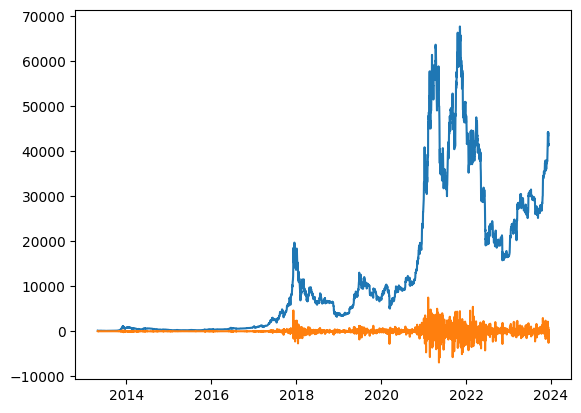

In [6]:
plt.plot(dati['Timestamp'], dati['Price'])
plt.plot(dati['Timestamp'], dati['Price_Diff'])

In [4]:
data_inizio = '2020-01-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]

In [24]:
data_fine = '2023-12-13'
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]

In [25]:
dati_temp = dati[indice_inizio:indice_fine + 1]

In [26]:
soglia_accettabile = 100

# Trova il periodo più lungo in cui il valore medio della derivata del prezzo è 0 o comunque sotto la soglia_accettabile
periodi = []
inizio_periodo = None
somma = 0

for i in range(len(dati_temp)):
    for k in range(i, len(dati_temp)):
        somma += dati_temp['Price_Diff'].iloc[k]
        if abs(somma) <= soglia_accettabile and i != k:
            periodi.append((dati_temp['Timestamp'].iloc[i], dati_temp['Timestamp'].iloc[k]))
    somma = 0

# Trova il periodo più lungo
periodo_piu_lungo = max(periodi, key=lambda x: (x[1] - x[0]).days)

print(f"Il periodo più lungo in cui il valore medio della derivata del prezzo è 0 va dalla data {periodo_piu_lungo[0]} alla data {periodo_piu_lungo[1]}")

# Cerco gli indici corrispondenti al periodo massimo trovato e restituisco la somma dei corrispondenti Price_Diff per verificare che sia effettivamente sotto la soglia
indice1 =  dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[0]].index[0]
indice2 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[1]].index[0]
print('La somma corrispondente al periodo più lungo trovato è:', sum(dati_temp['Price_Diff'].iloc[indice1: indice2 + 1]))

Il periodo più lungo in cui il valore medio della derivata del prezzo è 0 va dalla data 2021-01-09 00:00:00 alla data 2023-12-03 00:00:00


0

In [27]:
# Cerco gli indici corrispondenti al periodo massimo trovato e restituisco la somma dei corrispondenti Price_Diff per verificare che sia effettivamente sotto la soglia
indice1 =  dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[0]].index[0]
indice2 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[1]].index[0]
sum(dati_temp['Price_Diff'].iloc[indice1: indice2 + 1])

0

In [28]:
# Controllo per sicurezza che non ci siano altri periodi con la stesssa lunghezza massima
check = True
lunghezza_max = (periodo_piu_lungo[1] - periodo_piu_lungo[0]).days
for coppia in periodi:
    if (coppia[1] - coppia[0]).days == lunghezza_max and not (coppia[0] == periodo_piu_lungo[0] and coppia[1] == periodo_piu_lungo[1]):
        print('È stato trovato un altro periodo con la stessa lunghezza! Va dalla data', coppia[0], 'alla data', coppia[1])
        check = False
if check:
    print('Non sono stati trovati altri periodi altrettanto lunghi')

Non sono stati trovati altri periodi altrettanto lunghi
